In [1]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [2]:
df = panda.read_csv('TSLA.csv') 

In [3]:
#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal) 

In [4]:
#Dropping all unnecessary columns
df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")

In [5]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=False)

In [6]:
# Sepetaing the Date and Stockprice columns for the Train data
train_date = train.drop("Close", axis = "columns")
train_close = train.drop("Date", axis = "columns")

# Sepetaing the Date and Stockprice columns for the Test data
test_close = test.drop("Date", axis = "columns")
test_date = test.drop("Close", axis = "columns")

In [7]:
# linear regression on training data
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date,train_close)
train_prediction = reg_obj_train.predict(train_date)

# Converting int dates into DateTime for train_date
train_date_dt = train_date['Date'].apply(dt.datetime.fromordinal)

In [8]:
train_prediction = reg_obj_train.predict(train_date)

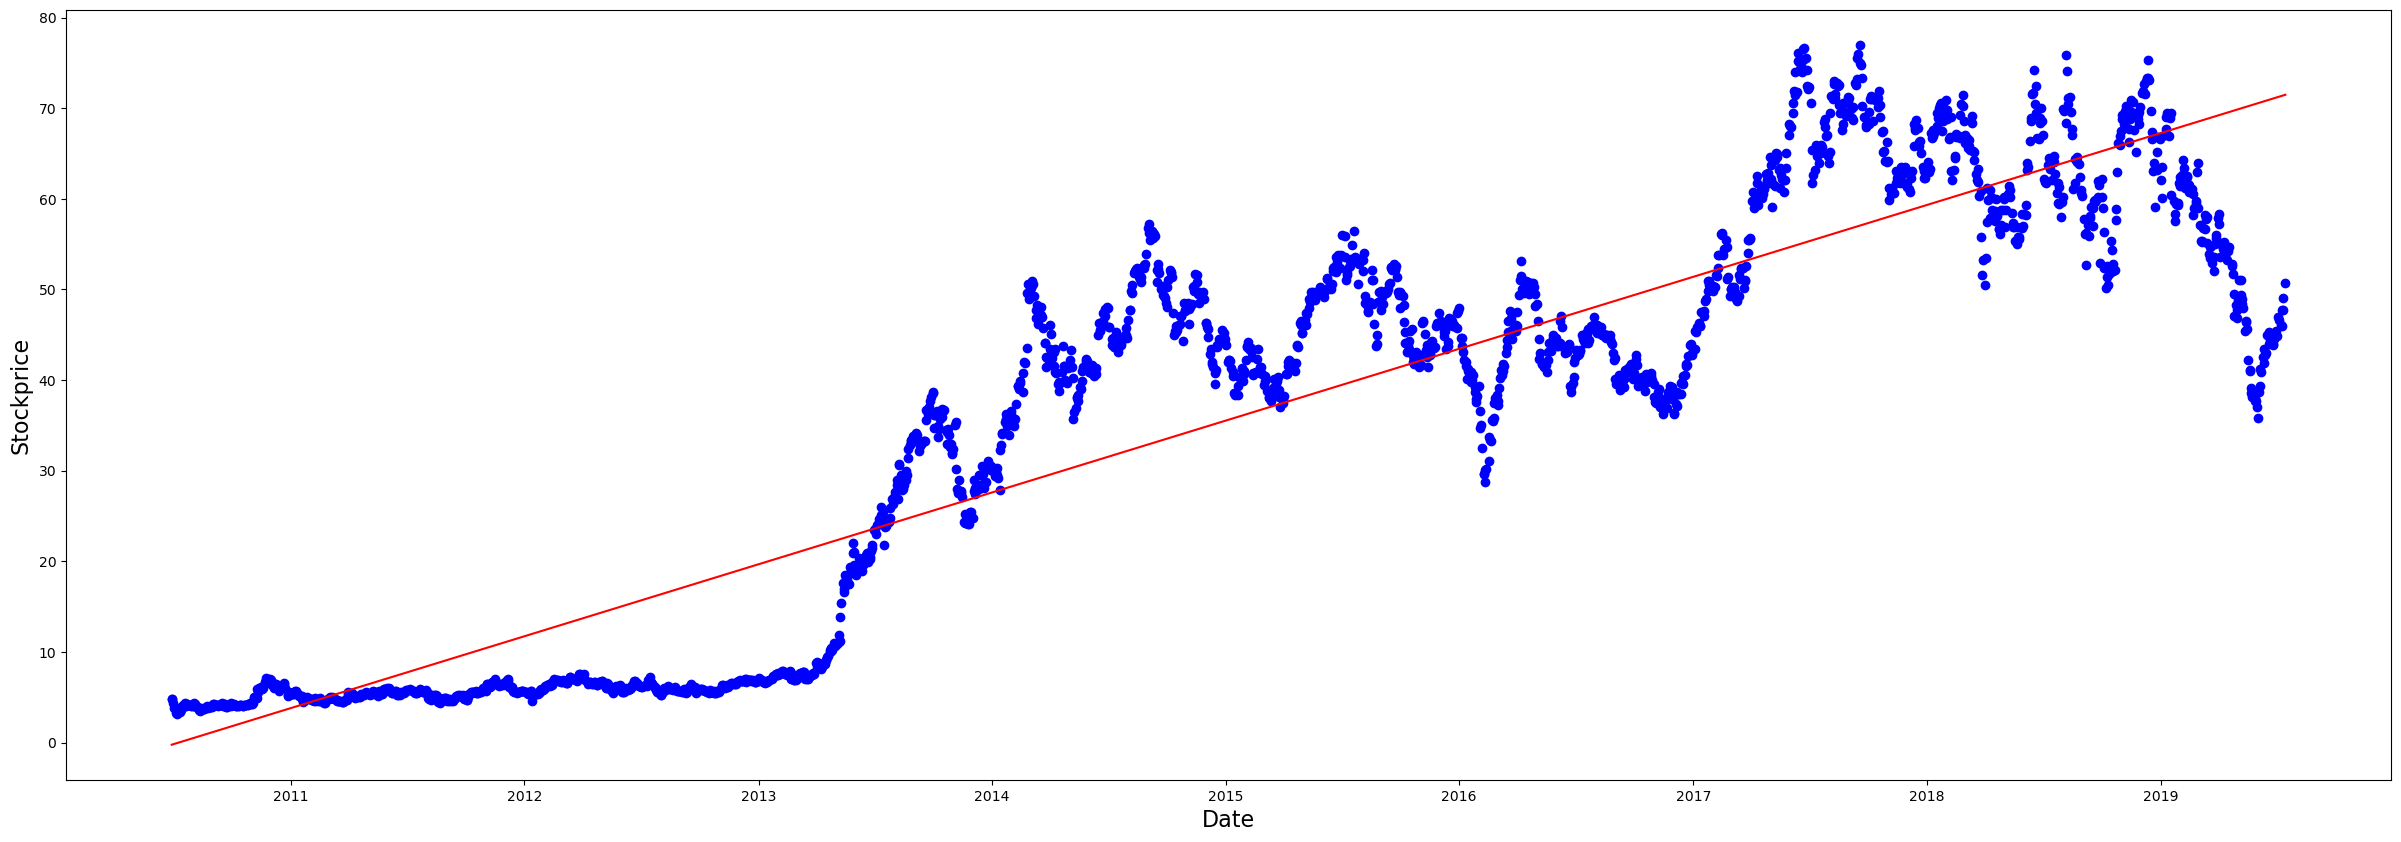

In [9]:
# Plot for visualising the Train data and Linear Regression
plt.figure(figsize=(30,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)

#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date_dt,train_close,color='blue')
plt.plot(train_date_dt,train_prediction,color='red')